In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV


In [9]:
df = pd.read_csv('/Users/akshitmehta/Desktop/HousePricePrediction/American_Housing_Data_20231209.csv')
df.head()

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601


In [16]:
#Dropping columns not relevant to the model
df_drop = df.drop(columns=['Address', 'City', 'State', 'Zip Code'])

In [17]:
#Begin preparing the pipelines for the models
X = df_drop.drop(columns=['Price'])
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Create the pipelines for the models

#defining the numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

#defining the numerical and categorical transformers
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), 
                                      ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), 
                                          ('onehot', OneHotEncoder())])

#creating the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [19]:
#Defining Baseline Model

# Create a pipeline for the baseline model
baseline_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('regressor', LinearRegression())])

# Train the baseline model
baseline_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred_baseline = baseline_pipeline.predict(X_test)

# Evaluate the baseline model
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)

print("Baseline Model Metrics:")
print("Mean Squared Error:", mse_baseline)
print("Mean Absolute Error:", mae_baseline)
print("R-squared:", r2_baseline)

Baseline Model Metrics:
Mean Squared Error: 582933120937.34
Mean Absolute Error: 268821.9685773679
R-squared: 0.4596712234102641


In [21]:
#Defining Decision Tree Model, random forest model and KNN model

# Create a pipeline for the decision tree model
decision_tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                         ('regressor', DecisionTreeRegressor(random_state=42))])

# Train the decision tree model
decision_tree_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred_decision_tree = decision_tree_pipeline.predict(X_test)

# Evaluate the decision tree model
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
mae_decision_tree = mean_absolute_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

print("Decision Tree Model Metrics:")
print("Mean Squared Error:", mse_decision_tree)
print("Mean Absolute Error:", mae_decision_tree)
print("R-squared:", r2_decision_tree)

# Create a pipeline for the random forest model
random_forest_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                         ('regressor', RandomForestRegressor(random_state=42))])

# Train the random forest model
random_forest_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred_random_forest = random_forest_pipeline.predict(X_test)

# Evaluate the random forest model
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

print("Random Forest Model Metrics:")
print("Mean Squared Error:", mse_random_forest)
print("Mean Absolute Error:", mae_random_forest)
print("R-squared:", r2_random_forest)

# Create a pipeline for the KNN model
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', KNeighborsRegressor())])

# Train the KNN model
knn_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_pipeline.predict(X_test)

# Evaluate the KNN model
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN Model Metrics:")
print("Mean Squared Error:", mse_knn)
print("Mean Absolute Error:", mae_knn)
print("R-squared:", r2_knn)



Decision Tree Model Metrics:
Mean Squared Error: 408351435810.9386
Mean Absolute Error: 193529.90310411734
R-squared: 0.6214934032645166
Random Forest Model Metrics:
Mean Squared Error: 288477639664.62787
Mean Absolute Error: 151487.77718085708
R-squared: 0.7326060837599278
KNN Model Metrics:
Mean Squared Error: 378499635307.7963
Mean Absolute Error: 166156.3526314868
R-squared: 0.6491634502485129


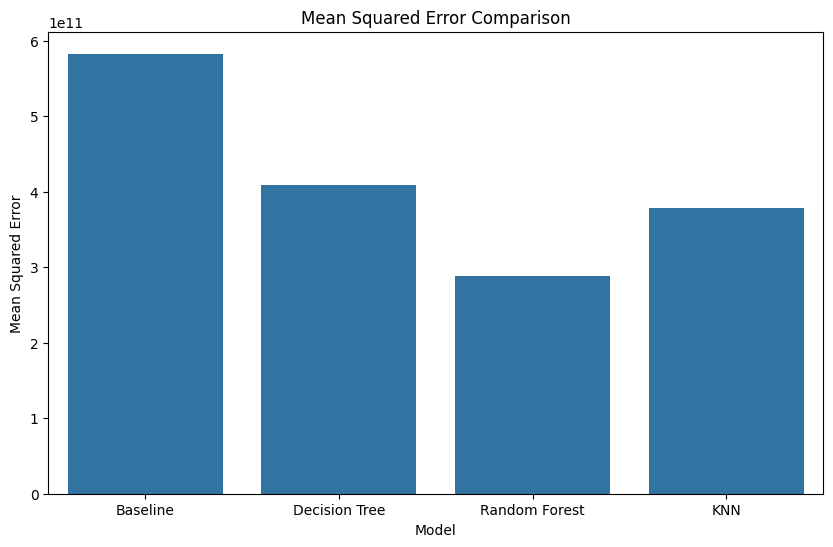

In [22]:
#creating a plot to compare the models

model_names = ['Baseline', 'Decision Tree', 'Random Forest', 'KNN']
mse_values = [mse_baseline, mse_decision_tree, mse_random_forest, mse_knn]
mae_values = [mae_baseline, mae_decision_tree, mae_random_forest, mae_knn]
r2_values = [r2_baseline, r2_decision_tree, r2_random_forest, r2_knn]

data = {'Model': model_names, 'MSE': mse_values, 'MAE': mae_values, 'R-squared': r2_values}
df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', data=df, ax=ax)
ax.set_xlabel('Model')
ax.set_ylabel('Mean Squared Error')
ax.set_title('Mean Squared Error Comparison')
plt.show()

In [ ]:
#creating a plot to compare the models

model_names = ['Baseline', 'Decision Tree', 'Random Forest', 'KNN']
mse_values = [mse_baseline, mse_decision_tree, mse_random_forest, mse_knn]
mae_values = [mae_baseline, mae_decision_tree, mae_random_forest, mae_knn]
r2_values = [r2_baseline, r2_decision_tree, r2_random_forest, r2_knn]

data = {'Model': model_names, 'MSE': mse_values, 'MAE': mae_values, 'R-squared': r2_values}
df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Model', y='R-squared', data=df, ax=ax)
ax.set_xlabel('Model')
ax.set_ylabel('R-squared')
ax.set_title('R-squared Comparison')
plt.show()

In [26]:
#Tuning the random forest model 

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['sqrt', 'log2']    
}

# Create a pipeline for the random forest model
random_forest_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                         ('regressor', RandomForestRegressor(random_state=42))])

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(random_forest_pipeline, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = random_search.best_estimator_

# Print the best model
print("Best Model:", best_model)

# Make predictions on the test set
y_pred_random_forest = best_model.predict(X_test)

# Evaluate the random forest model
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)    
r2_random_forest = r2_score(y_test, y_pred_random_forest)

print("Random Forest Model Metrics:")
print("Mean Squared Error:", mse_random_forest)
print("Mean Absolute Error:", mae_random_forest)
print("R-squared:", r2_random_forest)

/Users/akshitmehta/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/akshitmehta/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/akshitmehta/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_scorer.py", line 472, in __call__
    return estimator.score(*args, **kwargs)
  File "/Users/akshitmehta/Library/Python/3.9/lib/python/site-packages/sklearn/pipeline.py", line 1193, in score
    Xt = transform.transform(Xt)
  File "/Users/akshitmehta/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/Users/akshitmehta/Library/Python/3.9/lib/python/site-

Best Hyperparameters: {'regressor__n_estimators': 150, 'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 4, 'regressor__max_features': 'log2', 'regressor__max_depth': 20}
Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Beds', 'Baths', 'Living Space', 'Zip Code Population',
       'Zip Code Density', 'Median Household Income', 'Latitude', 'Longitude'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                               

In [27]:
#Export the model
import joblib
joblib.dump(best_model, 'House_Price_Prediction_Model.joblib')

['House_Price_Prediction_Model.joblib']